In [11]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [12]:
#farklı nümerik değerler üzerinde çalışacağım için KMeans fonksiyonu kullandım
#enlem ve boylam değerlerini kullanacağım bunlar farklı aralıklarda olduğu için önce scale etmem gerekti, 
#aynı aralıkta olmalarını sağladım


In [13]:
dataset = pd.read_csv("/kaggle/input/sfcrime/train.csv/train.csv")

In [14]:
train=pd.read_csv('../input/sfcrime/train.csv/train.csv',parse_dates=['Dates'])

In [15]:
test=pd.read_csv('../input/sfcrime/test.csv/test.csv',parse_dates=['Dates'],index_col=['Id'])

In [16]:
train.shape
#girdi veri kümelerinin boyutlarını kontrol ettim

(878049, 9)

In [17]:
test.shape

(884262, 6)

In [18]:
dataset.head(1000)

Dates        Category                       Descript  \
0    2015-05-13 23:53:00        WARRANTS                 WARRANT ARREST   
1    2015-05-13 23:53:00  OTHER OFFENSES       TRAFFIC VIOLATION ARREST   
2    2015-05-13 23:33:00  OTHER OFFENSES       TRAFFIC VIOLATION ARREST   
3    2015-05-13 23:30:00   LARCENY/THEFT   GRAND THEFT FROM LOCKED AUTO   
4    2015-05-13 23:30:00   LARCENY/THEFT   GRAND THEFT FROM LOCKED AUTO   
..                   ...             ...                            ...   
995  2015-05-11 11:00:00           FRAUD  FRAUDULENT CREDIT APPLICATION   
996  2015-05-11 11:00:00           FRAUD   CREDIT CARD, THEFT BY USE OF   
997  2015-05-11 11:00:00   LARCENY/THEFT        PETTY THEFT OF PROPERTY   
998  2015-05-11 11:00:00  MISSING PERSON               MISSING JUVENILE   
999  2015-05-11 11:00:00  MISSING PERSON                   FOUND PERSON   

     DayOfWeek PdDistrict      Resolution                    Address  \
0    Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1    Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2    Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3    Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4    Wednesday       PARK            NONE  100 Block of BRODERICK ST   
..         ...        ...             ...                        ...   
995     Monday    MISSION            NONE    400 Block of DOLORES ST   
996     Monday    MISSION            NONE    400 Block of DOLORES ST   
997     Monday   RICHMOND            NONE    3200 Block of BALBOA ST   
998     Monday  INGLESIDE            NONE     200 Block of CAYUGA AV   
999     Monday  INGLESIDE            NONE     200 Block of CAYUGA AV   

              X          Y  
0   -122.425892  37.774599  
1   -122.425892  37.774599  
2   -122.424363  37.800414  
3   -122.426995  37.800873  
4   -122.438738  37.771541  
..          ...        ...  
995 -122.426341  37.762579  
996 -122.426341  37.762579  
997 -122.493588  37.775941  
998 -122.433422  37.730390  
999 -122.433422  37.730390  

[1000 rows x 9 columns]

In [19]:
train.head(10) #eğitim veri setinin ilk 10 satırını görüntüledim
#Eğitim veri seti, bir makine öğrenimi modelinin eğitildiği ve öğrenme sürecinin gerçekleştiği veri setidir. 
#hedef değişken içerir(resolution)


Dates        Category                        Descript  \
0 2015-05-13 23:53:00        WARRANTS                  WARRANT ARREST   
1 2015-05-13 23:53:00  OTHER OFFENSES        TRAFFIC VIOLATION ARREST   
2 2015-05-13 23:33:00  OTHER OFFENSES        TRAFFIC VIOLATION ARREST   
3 2015-05-13 23:30:00   LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO   
4 2015-05-13 23:30:00   LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO   
5 2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM UNLOCKED AUTO   
6 2015-05-13 23:30:00   VEHICLE THEFT               STOLEN AUTOMOBILE   
7 2015-05-13 23:30:00   VEHICLE THEFT               STOLEN AUTOMOBILE   
8 2015-05-13 23:00:00   LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO   
9 2015-05-13 23:00:00   LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                        Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED             OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED             OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED      VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE       1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE      100 Block of BRODERICK ST   
5  Wednesday  INGLESIDE            NONE            0 Block of TEDDY AV   
6  Wednesday  INGLESIDE            NONE            AVALON AV / PERU AV   
7  Wednesday    BAYVIEW            NONE       KIRKWOOD AV / DONAHUE ST   
8  Wednesday   RICHMOND            NONE           600 Block of 47TH AV   
9  Wednesday    CENTRAL            NONE  JEFFERSON ST / LEAVENWORTH ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.438738  37.771541  
5 -122.403252  37.713431  
6 -122.423327  37.725138  
7 -122.371274  37.727564  
8 -122.508194  37.776601  
9 -122.419088  37.807802

In [20]:
test.head(10)  #test veri setinin ilk 10 satırını görüntüledim
#Test veri seti, bir makine öğrenimi modelinin ne kadar iyi çalıştığını değerlendirmek için kullanılan veri setidir. Model eğitildikten sonra, 
#test veri seti üzerindeki tahminlerle gerçek sonuçları karşılaştırır
#hedef değişkeni içermez
#bu sayede daha yalın bir tablo görünümünü elde ettim

Dates DayOfWeek PdDistrict                   Address  \
Id                                                                      
0  2015-05-10 23:59:00    Sunday    BAYVIEW   2000 Block of THOMAS AV   
1  2015-05-10 23:51:00    Sunday    BAYVIEW        3RD ST / REVERE AV   
2  2015-05-10 23:50:00    Sunday   NORTHERN    2000 Block of GOUGH ST   
3  2015-05-10 23:45:00    Sunday  INGLESIDE  4700 Block of MISSION ST   
4  2015-05-10 23:45:00    Sunday  INGLESIDE  4700 Block of MISSION ST   
5  2015-05-10 23:40:00    Sunday    TARAVAL     BROAD ST / CAPITOL AV   
6  2015-05-10 23:30:00    Sunday  INGLESIDE   100 Block of CHENERY ST   
7  2015-05-10 23:30:00    Sunday  INGLESIDE     200 Block of BANKS ST   
8  2015-05-10 23:10:00    Sunday    MISSION     2900 Block of 16TH ST   
9  2015-05-10 23:10:00    Sunday    CENTRAL      TAYLOR ST / GREEN ST   

             X          Y  
Id                         
0  -122.399588  37.735051  
1  -122.391523  37.732432  
2  -122.426002  37.792212  
3  -122.437394  37.721412  
4  -122.437394  37.721412  
5  -122.459024  37.713172  
6  -122.425616  37.739351  
7  -122.412652  37.739750  
8  -122.418700  37.765165  
9  -122.413935  37.798886

In [21]:
# Y enlem ,  X boylam

In [22]:
#dataset = dataset.drop(['PdDistrict', 'Address', 'Resolution', 'Descript', 'DayOfWeek'], axis=1)

In [23]:
dataset.tail(5)

Dates                Category  \
878044  2003-01-06 00:15:00                 ROBBERY   
878045  2003-01-06 00:01:00           LARCENY/THEFT   
878046  2003-01-06 00:01:00           LARCENY/THEFT   
878047  2003-01-06 00:01:00               VANDALISM   
878048  2003-01-06 00:01:00  FORGERY/COUNTERFEITING   

                                         Descript DayOfWeek PdDistrict  \
878044           ROBBERY ON THE STREET WITH A GUN    Monday    TARAVAL   
878045               GRAND THEFT FROM LOCKED AUTO    Monday  INGLESIDE   
878046               GRAND THEFT FROM LOCKED AUTO    Monday   SOUTHERN   
878047  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES    Monday   SOUTHERN   
878048                   CHECKS, FORGERY (FELONY)    Monday    BAYVIEW   

       Resolution                     Address           X          Y  
878044       NONE  FARALLONES ST / CAPITOL AV -122.459033  37.714056  
878045       NONE        600 Block of EDNA ST -122.447364  37.731948  
878046       NONE          5TH ST / FOLSOM ST -122.403390  37.780266  
878047       NONE        TOWNSEND ST / 2ND ST -122.390531  37.780607  
878048       NONE    1800 Block of NEWCOMB AV -122.394926  37.738212

In [24]:
dataset.isnull().sum()

#herhangi bir null ifadesi var mı diye kontrol etmek istedim
#temiz bir veri seti çıktı

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [25]:
# bu dataset 2003-2015 yılları arasındaki verileri içeriyor
# ben sadece 2014 yılındaki verileri inceleyeceğim
# filtreleme işlemi yapacağım

In [26]:
# tarih bilgisi tire karakterlerine göre parçalanarak sadece yıl kısmı alınıyor.
# yıl kısmı "Dates" sütununun yeni değeri olarak atanıyor.

In [27]:
f = lambda x: (x["Dates"].split('-'))[0]
dataset["Dates"] = dataset.apply(f, axis=1)
dataset.head()

#dates sütununa filtreleme işlemi yapıp sadece yılların gözükmesini sağladım

Dates        Category                      Descript  DayOfWeek PdDistrict  \
0  2015        WARRANTS                WARRANT ARREST  Wednesday   NORTHERN   
1  2015  OTHER OFFENSES      TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
2  2015  OTHER OFFENSES      TRAFFIC VIOLATION ARREST  Wednesday   NORTHERN   
3  2015   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO  Wednesday   NORTHERN   
4  2015   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO  Wednesday       PARK   

       Resolution                    Address           X          Y  
0  ARREST, BOOKED         OAK ST / LAGUNA ST -122.425892  37.774599  
1  ARREST, BOOKED         OAK ST / LAGUNA ST -122.425892  37.774599  
2  ARREST, BOOKED  VANNESS AV / GREENWICH ST -122.424363  37.800414  
3            NONE   1500 Block of LOMBARD ST -122.426995  37.800873  
4            NONE  100 Block of BRODERICK ST -122.438738  37.771541

In [28]:
dataset.tail()

Dates                Category  \
878044  2003                 ROBBERY   
878045  2003           LARCENY/THEFT   
878046  2003           LARCENY/THEFT   
878047  2003               VANDALISM   
878048  2003  FORGERY/COUNTERFEITING   

                                         Descript DayOfWeek PdDistrict  \
878044           ROBBERY ON THE STREET WITH A GUN    Monday    TARAVAL   
878045               GRAND THEFT FROM LOCKED AUTO    Monday  INGLESIDE   
878046               GRAND THEFT FROM LOCKED AUTO    Monday   SOUTHERN   
878047  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES    Monday   SOUTHERN   
878048                   CHECKS, FORGERY (FELONY)    Monday    BAYVIEW   

       Resolution                     Address           X          Y  
878044       NONE  FARALLONES ST / CAPITOL AV -122.459033  37.714056  
878045       NONE        600 Block of EDNA ST -122.447364  37.731948  
878046       NONE          5TH ST / FOLSOM ST -122.403390  37.780266  
878047       NONE        TOWNSEND ST / 2ND ST -122.390531  37.780607  
878048       NONE    1800 Block of NEWCOMB AV -122.394926  37.738212

In [29]:
df_2014 = dataset[(dataset.Dates == '2014')]
df_2014.head()

#sadece 2014 yılı verilerini almak istediğim için filtreleme yaptım

Dates       Category                                 Descript DayOfWeek  \
27584  2014  LARCENY/THEFT                   GRAND THEFT PICKPOCKET    Sunday   
27585  2014  LARCENY/THEFT             GRAND THEFT FROM LOCKED AUTO    Sunday   
27586  2014  VEHICLE THEFT                        STOLEN AUTOMOBILE    Sunday   
27587  2014        ASSAULT  AGGRAVATED ASSAULT WITH A DEADLY WEAPON    Sunday   
27588  2014        ASSAULT              INFLICT INJURY ON COHABITEE    Sunday   

      PdDistrict      Resolution                   Address           X  \
27584    MISSION            NONE     4100 Block of 18TH ST -122.435563   
27585   NORTHERN            NONE  1900 Block of LOMBARD ST -122.433575   
27586    CENTRAL            NONE     500 Block of GEARY ST -122.412777   
27587   NORTHERN  ARREST, BOOKED        0 Block of ROSE ST -122.421702   
27588   NORTHERN  ARREST, BOOKED        0 Block of ROSE ST -122.421702   

               Y  
27584  37.760801  
27585  37.800037  
27586  37.786834  
27587  37.773641  
27588  37.773641

In [30]:
scaler = MinMaxScaler()  #bu ölçeklendirmeyi yaparak X-Y sütunlarını 0-1 aralığına dönüştürdüm

scaler.fit(df_2014[['X']])
df_2014['X_scaled']= scaler.transform(df_2014[['X']])

scaler.fit(df_2014[['Y']])
df_2014['Y_scaled']= scaler.transform(df_2014[['Y']])
#yaptığım bu ölçeklendirme işlemi ile X_scaled ve Y_scaled sütunları da tabloya eklendi

/tmp/ipykernel_32/2985121350.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014['X_scaled']= scaler.transform(df_2014[['X']])
/tmp/ipykernel_32/2985121350.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014['Y_scaled']= scaler.transform(df_2014[['Y']])


In [31]:
df_2014.head()
#bu sütunları tabloya eklememin sebebi daha kolay bir analiz yapmak ve verilerimi daha kolay kullanmak içindi

Dates       Category                                 Descript DayOfWeek  \
27584  2014  LARCENY/THEFT                   GRAND THEFT PICKPOCKET    Sunday   
27585  2014  LARCENY/THEFT             GRAND THEFT FROM LOCKED AUTO    Sunday   
27586  2014  VEHICLE THEFT                        STOLEN AUTOMOBILE    Sunday   
27587  2014        ASSAULT  AGGRAVATED ASSAULT WITH A DEADLY WEAPON    Sunday   
27588  2014        ASSAULT              INFLICT INJURY ON COHABITEE    Sunday   

      PdDistrict      Resolution                   Address           X  \
27584    MISSION            NONE     4100 Block of 18TH ST -122.435563   
27585   NORTHERN            NONE  1900 Block of LOMBARD ST -122.433575   
27586    CENTRAL            NONE     500 Block of GEARY ST -122.412777   
27587   NORTHERN  ARREST, BOOKED        0 Block of ROSE ST -122.421702   
27588   NORTHERN  ARREST, BOOKED        0 Block of ROSE ST -122.421702   

               Y  X_scaled  Y_scaled  
27584  37.760801  0.526134  0.471397  
27585  37.800037  0.539528  0.821894  
27586  37.786834  0.679676  0.703952  
27587  37.773641  0.619540  0.586098  
27588  37.773641  0.619540  0.586098

In [32]:
#ELBOW Metodunu kullanacağım (dirsek yöntemi)
# bu metodu kullanmamın temel sebebi bir veri kümesi için en uygun küme sayısını belirlemeye yarayan bir metod olması

In [33]:
k_range = range(1,15)
#1-15 arası olası küme aralığını seçtim

list_dist = []

for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(df_2014[['X_scaled', 'Y_scaled']])
    list_dist.append(model.inertia_)
    
#her k için bir döngü başlattım
#her k için KMeans kümeleme modeli oluşturdum
#n_cluster=k olması farklı küme sayıları için 
#farklı kümeler oluşturulmasını sağlar
#K-means modeli, veri çerçevesindeki X_scaled ve Y_scaled sütunlarını kullanarak eğitti
#Her KMeans modeli için WCSS değeri (inertia_ özelliği) hesaplanır ve bu değer, 
#list_dist adında bir liste içine eklenir. WCSS, her küme içindeki 
#veri noktalarının küme merkezine olan kare uzaklıklarının toplamını temsil eder


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

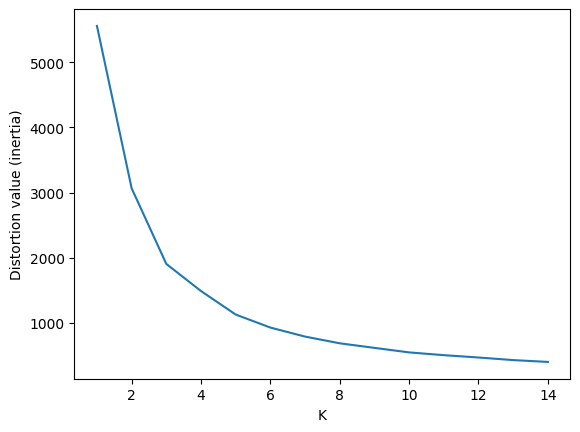

In [34]:
from matplotlib import pyplot as plt

plt.xlabel('K')
plt.ylabel('Distortion value (inertia)')
plt.plot(k_range, list_dist)
plt.show()

#elbow metodunun sonuçlarını görselleştirdim

In [35]:
#grafiğin açıklaması:
#plt.xlabel('K'): Grafik üzerinde x-ekseninin etiketini belirler. 
#Bu satır, "K"yi (küme sayısı) x-ekseni etiketi olarak ayarlar.
#plt.ylabel('Distortion value (inertia)'): Grafik üzerinde y-ekseninin etiketini belirler. Bu satır, 
#"Distortion value (inertia)"yı y-ekseni etiketi olarak ayarlar. Bu etiket, WCSS değerini temsil eder
# WCSS nedir?
#her küme için veri merkeze olan kare uzaklıklarının toplamı
#plt.plot(k_range, list_dist):çizgi grafiği çizer

In [36]:
#bu kod ile KMeans kümeleme algoritmasını kullanıp,her veri noktasının hangi küme içinde olduğunu tahmin ettim
model = KMeans(n_clusters=5)  #kaç küme oluşturulmalı = 5

y_predicted=model.fit_predict(df_2014[['X_scaled','Y_scaled']])
#öncesinde X_scaled,Y_scaled değerlerini eklemiştim
#df_2014 veri çerçevesi içinde bu alt kümeleri eğittim
#fit_predict ile veri noktalarını kümelere atadım, her bir veri noktasının hangi kümeye ait old.

y_predicted 
#her veri noktasının tahmini küme üyeliğini belirtir

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 0, 0, ..., 0, 3, 0], dtype=int32)

In [37]:
#df_2014 veri çerçevesine yeni bir sütun ekleyip KMeans kümeleme sonuçlarını veri çerç. ekledim 
#ve sonuçları görmek için veri çerçevesini döndürdüm

df_2014['cluster']=y_predicted  #df_2014 e yeni sütun ekledi, adı cluster, tahminleri buraya ekledi
#cluster her bir veri noktasının hangi kümeye gideceğini gösterdi
df_2014  #veri çerçevesini döndürdü

/tmp/ipykernel_32/619989771.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2014['cluster']=y_predicted  #df_2014 e yeni sütun ekledi, adı cluster, tahminleri buraya ekledi


Dates        Category                                 Descript  \
27584   2014   LARCENY/THEFT                   GRAND THEFT PICKPOCKET   
27585   2014   LARCENY/THEFT             GRAND THEFT FROM LOCKED AUTO   
27586   2014   VEHICLE THEFT                        STOLEN AUTOMOBILE   
27587   2014         ASSAULT  AGGRAVATED ASSAULT WITH A DEADLY WEAPON   
27588   2014         ASSAULT              INFLICT INJURY ON COHABITEE   
...      ...             ...                                      ...   
102345  2014  OTHER OFFENSES                      PROBATION VIOLATION   
102346  2014        WARRANTS                         PROBATION SEARCH   
102347  2014           FRAUD  FRAUDULENT USE OF AUTOMATED TELLER CARD   
102348  2014    NON-CRIMINAL                            LOST PROPERTY   
102349  2014           FRAUD             FALSE PRETENSES, GRAND THEFT   

       DayOfWeek PdDistrict      Resolution                    Address  \
27584     Sunday    MISSION            NONE      4100 Block of 18TH ST   
27585     Sunday   NORTHERN            NONE   1900 Block of LOMBARD ST   
27586     Sunday    CENTRAL            NONE      500 Block of GEARY ST   
27587     Sunday   NORTHERN  ARREST, BOOKED         0 Block of ROSE ST   
27588     Sunday   NORTHERN  ARREST, BOOKED         0 Block of ROSE ST   
...          ...        ...             ...                        ...   
102345    Monday    BAYVIEW            NONE      0 Block of NICHOLS WY   
102346    Monday    BAYVIEW            NONE      0 Block of NICHOLS WY   
102347    Monday   NORTHERN            NONE       600 Block of EDDY ST   
102348    Monday    BAYVIEW            NONE      100 Block of COLBY ST   
102349    Monday    CENTRAL            NONE  1200 Block of STOCKTON ST   

                 X          Y  X_scaled  Y_scaled  cluster  
27584  -122.435563  37.760801  0.526134  0.471397        2  
27585  -122.433575  37.800037  0.539528  0.821894        0  
27586  -122.412777  37.786834  0.679676  0.703952        0  
27587  -122.421702  37.773641  0.619540  0.586098        2  
27588  -122.421702  37.773641  0.619540  0.586098        2  
...            ...        ...       ...       ...      ...  
102345 -122.387235  37.719401  0.851793  0.101571        3  
102346 -122.387235  37.719401  0.851793  0.101571        3  
102347 -122.418382  37.783258  0.641908  0.672007        0  
102348 -122.413652  37.728320  0.673778  0.181249        3  
102349 -122.408563  37.797007  0.708076  0.794822        0  

[74766 rows x 12 columns]

In [ ]:
#mesela burada cluster değerinin 2 ye eşit olması 
#KMeans algoritması tarafından veri seti içinde aynı küme içine atanmış veri noktalarını temsil eder

In [38]:
#plotly kütüphanesini kullanacağım, emin olmak için tekrar inmiş mi diye kontrol ettim
!pip install plotly


In [39]:
#plotly görselleştirmeler için kullanılan bir kütüphane 
#burada bir harita çıkarmak istediğim için bu kütüphaneyi import ettim

import plotly.express as px 

In [40]:
figure = px.scatter_mapbox(df_2014, lat='Y', lon='X',                       
                       center = dict(lat = 37.8, lon = -122.4), 
                       zoom = 9,                                
                       opacity = .9,     #saydamlığını belirledim                      
                       mapbox_style = 'stamen-terrain',       
                       color = 'cluster',                      
                       title = 'San Francisco Suç Oranları',
                       width = 1100,
                       height = 700,                     
                       hover_data = ['cluster', 'Category', 'Y', 'X']
                       )

figure.show()

In [41]:
import seaborn as sns
#veri grafikleri kullanabilmek için seaborn kütüphanesini import ettim

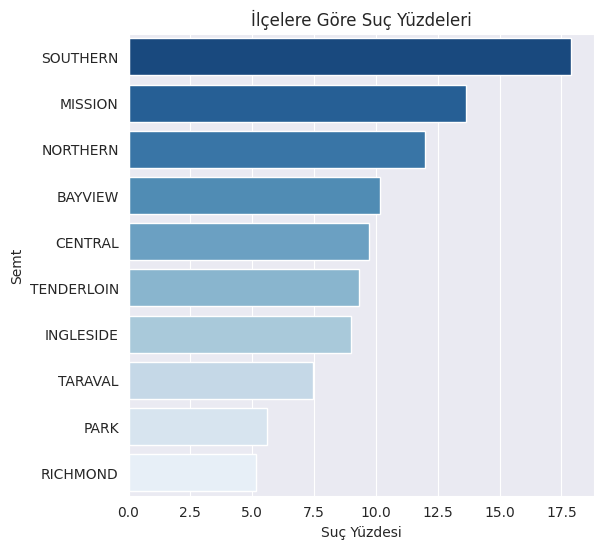

In [51]:
distcrime = train['PdDistrict'].value_counts().sort_values(ascending=False)
#train adlı veri setimi eklemiştim burada o verilere göre görselleştirme yapacağım
#pddistrict sütununa göre nasıl dağıldığını gösterecek

plt.figure(figsize=(6, 6))
with sns.axes_style('darkgrid'):
    ax = sns.barplot(x=distcrime.values / (distcrime.values.sum()) * 100.0, y=distcrime.index, orient='h', palette='Blues_r')
    #her bölgenin suç sayısının toplam suç sayısına oranını hesapladım

plt.title('İlçelere Göre Suç Yüzdeleri')
plt.xlabel('Suç Yüzdesi')
plt.ylabel('Semt')
plt.show()



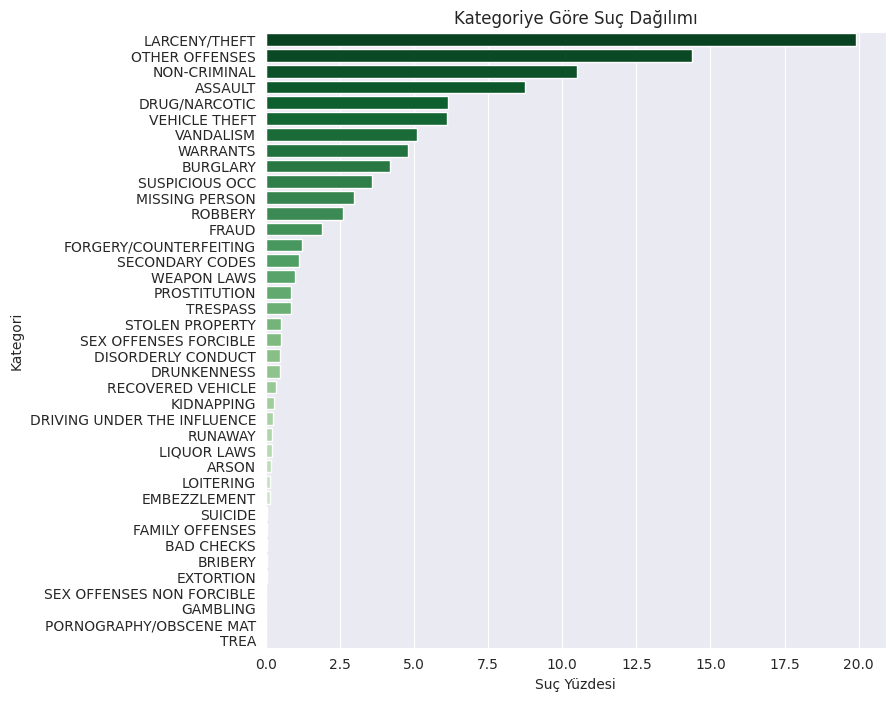

In [55]:
catcrime = train['Category'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8,8))
with sns.axes_style('darkgrid'):
    ax = sns.barplot(x=catcrime.values / (catcrime.values.sum()) * 100.0, y=catcrime.index, orient='h', palette='Greens_r')

plt.xlabel('Suç Yüzdesi')
plt.ylabel('Kategori')
plt.title('Kategoriye Göre Suç Dağılımı')
plt.show() 

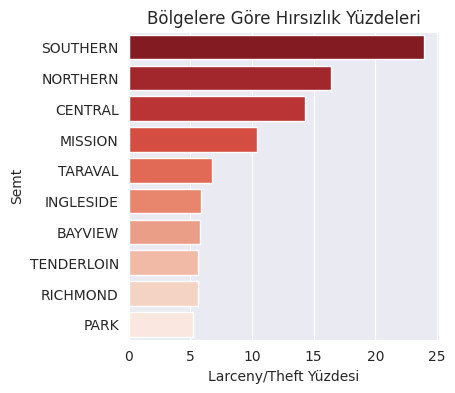

In [56]:
# 'LARCENY/THEFT' suçlarına ait suçların her bölgeye göre yüzde dağılımını gösterecek
# böylece hangi bölgenin bu tür suçlarda daha fazla veya az etkilendiğini anlayacağız

theft = dataset[dataset['Category'] == 'LARCENY/THEFT']

# PdDistrict sütununu kullanarak grupladım ve saydım
theft_by_district = theft['PdDistrict'].value_counts()

plt.figure(figsize=(4, 4))
with sns.axes_style('darkgrid'):
    ax = sns.barplot(x=theft_by_district.values / (theft_by_district.values.sum()) * 100.0, y=theft_by_district.index, orient='h', palette='Reds_r')

plt.xlabel('Larceny/Theft Yüzdesi')
plt.ylabel('Semt')
plt.title('Bölgelere Göre Hırsızlık Yüzdeleri')
plt.show()

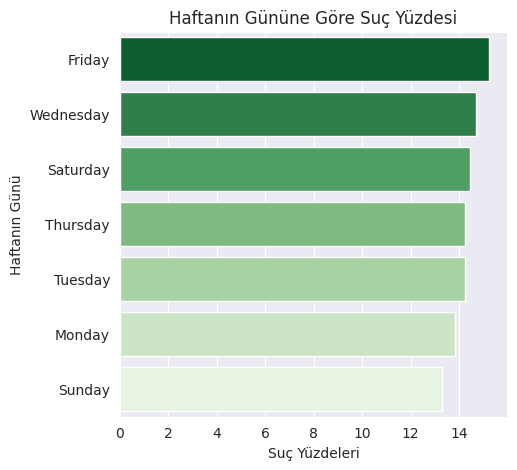

In [58]:
crimeday = train['DayOfWeek'].value_counts()

plt.figure(figsize=(5, 5))
with sns.axes_style('darkgrid'):
    ax = sns.barplot(x=crimeday.values / (crimeday.values.sum()) * 100.0, y=crimeday.index, orient='h', palette='Greens_r')

plt.xlabel('Suç Yüzdeleri')
plt.ylabel('Haftanın Günü')
plt.title('Haftanın Gününe Göre Suç Yüzdesi')
plt.show()

In [78]:
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder

In [77]:
categorical_columns = ['DayOfWeek', 'PdDistrict']


In [80]:
le = LabelEncoder()
for column in categorical_columns:
    train[column] = le.fit_transform(train[column])

In [81]:
y = train['Category']


In [83]:
lgb = LGBMClassifier(objective='multiclass', num_class=38, max_bin=465, max_delta_step=0.9,
                     learning_rate=0.4, num_leaves=40, n_estimators=100)
lgb.fit(train, y, categorical_feature=['DayOfWeek','PdDistrict'], eval_metric='logloss')

/opt/conda/lib/python3.10/site-packages/lightgbm/basic.py:2065: UserWarning:

Using categorical_feature in Dataset.



ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in the following fields: Dates, Category, Descript, Resolution, Address

In [82]:
lgb=LGBMClassifier(objective='multiclass',num_class=38,max_bin=465,max_delta_step=0.9,
                   learning_rate=0.4,num_leaves=40,n_estimators=100)
lgb.fit(train,y,categorical_feature=['DayOfWeek','PdDistrict'],eval_metric='logloss')
prediction=lgb.predict_proba(test)
subm=pd.DataFrame(prediction, columns=le1.inverse_transform(np.linspace(0, 38, 39, dtype='int16')), index=test.index)
subm.to_csv('submission.csv',index_label='Id')

/opt/conda/lib/python3.10/site-packages/lightgbm/basic.py:2065: UserWarning:

Using categorical_feature in Dataset.



ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in the following fields: Dates, Category, Descript, Resolution, Address